<h2>Preventing Cells From Being Uploaded to Github</h2>

In [4]:
# @hidden_cell

#YOU CAN PREVENT CELLS FROM BEING UPLOADED TO GITHUB WHEN PUSHING. USE THE ABOVE STATEMENT.
password = "secretpassword"

<h2>Running Commands in the Pod</h2>

In [7]:
#USE THE ! TO RUN COMMANDS INSIDE THE POD:
!pwd

/home/wsuser/work


<h2>Working with Files</h2>

In [10]:
#IF YOU DRAG AND DROP FILES EITHER FROM THE PROJECT VIEW OR NOTEBOOK, THE FILES WILL PERMANENTLY RESIDE 
# IN /project_data/data_asset

!ls /project_data/data_asset

PimaIndians.csv


In [12]:
#HOWEVER, ONLY CERTAIN FILE TYPES WILL SHOW UP IN THE PROJECTS FILE WITHOUT RUNNING SOME COMMANDS!
# WE WILL UPLOAD ANOTHER FILE THAT'S NOT A CSV FILE:

import pickle

emp = {1:"A",2:"B",3:"C",4:"D",5:"E"}
pickling_on = open("Emp.pickle","wb")
pickle.dump(emp, pickling_on)
pickling_on.close()

In [15]:
#This is the PODS working directory! The file will go away when the pod restarts. 
# We need to move it so it stays in the projects directory.

!mv /home/wsuser/work/Emp.pickle /project_data/data_asset

In [16]:
#NOTE: YOU COULD HAVE USED pickle.dump AND SPECIFIED THE /project_data/data_asset AS THE TARGET
# THIS WAS TO SHOW THE DIFFERENCE BETWEEN THE TWO DIRECTORIES.

!ls /project_data/data_asset

Emp.pickle  PimaIndians.csv


HOWEVER, YOU WILL NOTICE THAT THE PICKLE FILE DOES NOT SHOW UP IN OUR PROJECT.

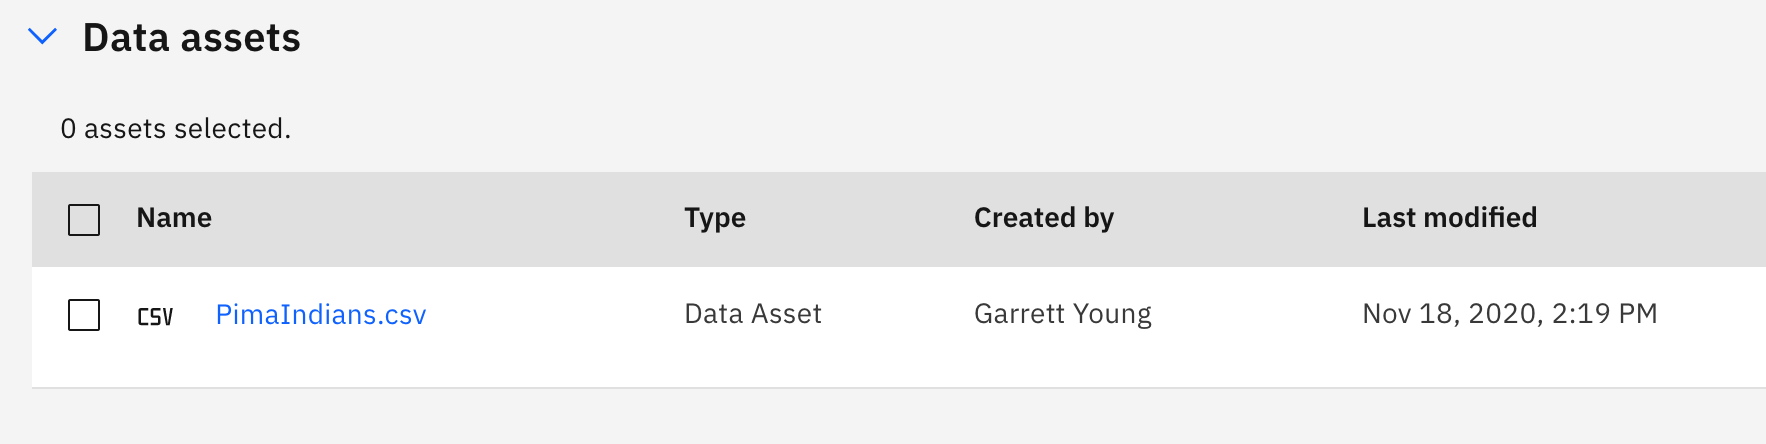

In [22]:
#REFERENCE: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/project-lib-python.html

#IT'S NOT NESSICARY TO LOAD THE FILE, BUT TO GET THIS TO SHOW UP IN THE PROJECT, YOU NEED TO DO 
#THE FOLLOWING:

from project_lib import Project
project = Project.access()

project.save_data("Emp.pickle", "Emp.pickle", overwrite = True)
#from project_lib import Project

#project.save_data("file_name.csv", pandas_df.to_csv(index=False))
#save_data(file_name, data, set_project_asset=True, overwrite=False)

{'file_name': 'Emp.pickle',
 'message': 'File saved to project storage.',
 'asset_id': '56774c56-a986-421f-868f-4ea19408ed77'}

Notice now the file shows in the projects. Again, not needed to use the file. Just if you want it to show in your project.

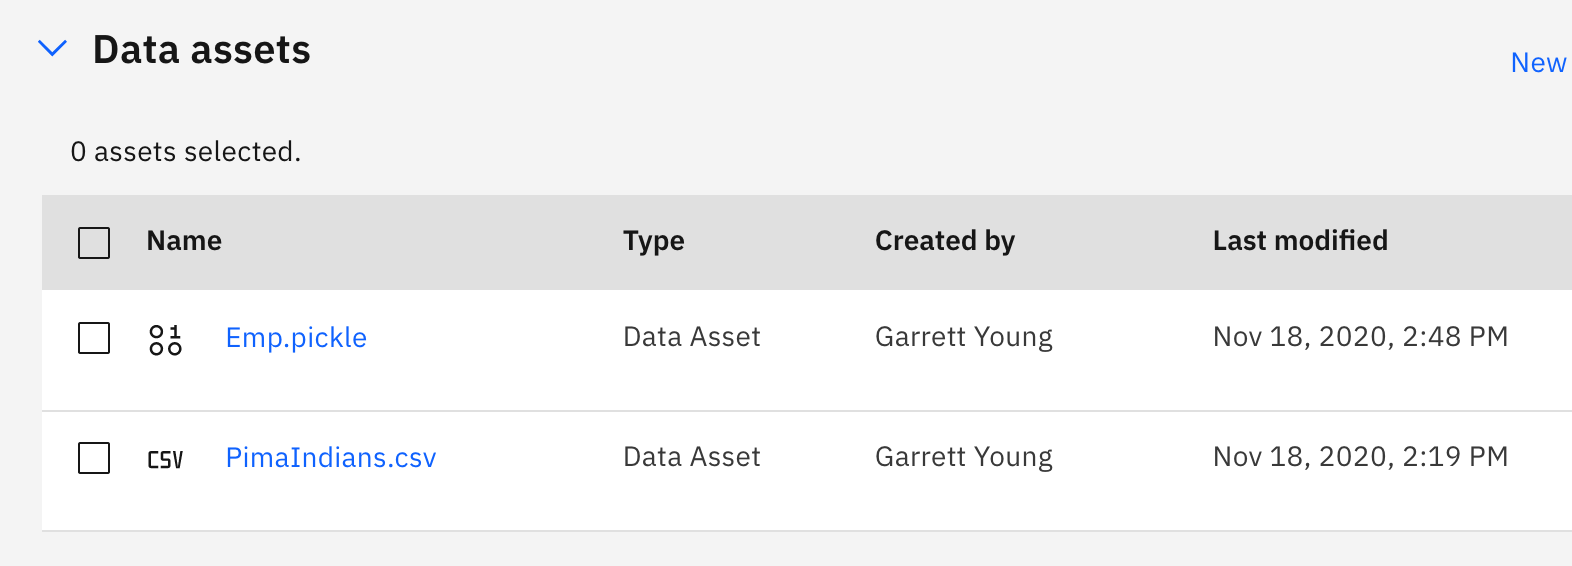


<h2>Working with Watson Machine Learning</h2>

Use this to setup API connections to WML On prem or Cloud

In [10]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

#SET True/False
onPrem=True

#GLOBAL FOR IF/THEN
wml_credentials=''

if(onPrem == True):
    print("Setting up WML for On Prem...")
    
    import sys,os,os.path
    token = os.environ['USER_ACCESS_TOKEN']
    
    wml_credentials = {
        "token": token,
        "instance_id" : "wml_local",
        "url": "https://cp4d-cpd-cp4d.sjsu-cp4dv301-505749-73aebe06726e634c608c4167edcc2aeb-0000.sjc04.containers.appdomain.cloud",
        "version": "3.0.0"
    }
    
else:
    print("Setting up WML for Cloud...")
    
    wml_credentials = {
        "apikey"      : "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "instance_id" : "12345678-1234-1234-1234-123456789012",
        "url"         : "https://us-south.ml.cloud.ibm.com"
    }

client = WatsonMachineLearningAPIClient( wml_credentials )

#EXAMPLE OF HOW TO IMPLEMENT BEARER TOKEN:
# NOTE: generate iam_token and retrieve ml_instance_id based on provided documentation	
#header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + client.wml_token, 'ML-Instance-ID': "12345678-1234-1234-1234-123456789012"}

Setting up WML for On Prem...


In [1]:
#wml_credentials